# Knowing the data thorugh EDA 

# Project EDA Pipeline 
1. Problem statement 
2. Know about your data attributes 

--------------------- Exploratory Data Analysis  ----------------------------

3. Data Insepections 
    - Categorical features 
    - Numerical features
4. Univarient Analysis 
5. Bivarient Analysis 
6. Multivarient Analysis

--------------------- Feature Engineering ----------------------------

7. Data Cleaning 
    - Handling Missing Values 
        - Mean/Median/mode Imputation
        - Random Sampling Imputation
        - Algorithm 
    - Handling Categorical Feature 
        - Normal Encoding 
            - one hot Encoding 
            - one hot Encoding with many categorical 
            - mean Encoding 
        - Ordinal Encoding 
            - Label Encoding 
            - Target Guided Ordinal Encoding 
    - Handling Outliers
         - IQR 
         - Z test
    - Feature Scaling 
         - Standard scalar 
         - Min-Max Normalization 
         - Robust Scalar 
    - Transforamation ( for Algorithms like Linear regression, Logistic Regression etc
        - Check data is normally Distributed or not 
        - Logarithmic Transforamtion
        - Reciprocal Transformation
        - Square Root Transformation
        - Exponential Transformation
        - Box - Cox Transformation
     
--------------------- Feature Selection  ----------------------------

8. correlation 
9. Correlated Feature Handling by VIF score 
10. feature selection 
    - Using information Gain for classsigication in Ml
    - Using information Gain for Regression in Ml
    - Using chi2 Statisticall Analysis 
 

# 1. Problem Statement 

    Nowadays, shopping malls and Big Marts keep track of individual item sales data in
    order to forecast future client demand and adjust inventory management. In a data
    warehouse, these data stores hold a significant amount of consumer information and
    particular item details. By mining the data store from the data warehouse, more
    anomalies and common patterns can be discovered. 
    
    Task : build a solution that should able to predict the sales of the
           different stores of Big Mart according to the provided dataset.
           
### This is Regression Problem we need to predict sales of stores 

# 2. Data/Features 
- Item_Identifier : Unique product ID
- Item_Weight                        : Weight of product
- Item_Fat_Content                   : Whether the product is low fat or not
- Item_Visibility                    : The % of total display area of all products in a store allocated to particular product
- Item_Type                          : The category to which the product belongs
- Item_MRP                           : Maximum Retail Price (list price) of the product
- Outlet_Identifier                  : Unique store ID
- Outlet_Establishment_Year          : The year in which store was established
- Outlet_Size                        : The size of the store in terms of ground area covered
- Outlet_Location_Type               : The type of city in which the store is located
- Outlet_Type                        : Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales                  : Sales of the product in the particular store.

# Importing Required Libraries 

In [1]:
# Importing Libraries 
import os, sys
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
"D:\Projects_new\Stores_Sales_Prediction\Juypter Notebook\train.csv"
DATA_DIR = r'D:\Projects_new\Stores_Sales_Prediction\Juypter Notebook'
TRAIN_DATA_FILE_NAME = 'Train.csv'
TEST_DATA_FILE_NAME = 'Test.csv'

# Creating File Path
TRAIN_FILE_PATH = os.path.join(DATA_DIR,TRAIN_DATA_FILE_NAME)
TEST_FILE_PATH = os.path.join(DATA_DIR,TEST_DATA_FILE_NAME)

# Reading Train_file
train_df = pd.read_csv(TRAIN_FILE_PATH)
train_df.head(10)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# Exploratory Data Analysis 

# 3. Inspecting Data

In [3]:
# function to get numerical and categorical columns 
def Numerical_categorical_column(dataframe):
    '''
    This function returns the numerical and categorical column 
    return numerical_columns,categorical_columns
    '''
    numerical_columns = [i for i in dataframe.columns if  dataframe[i].dtype != 'O']
    categorical_columns = [i for i in dataframe.columns if  dataframe[i].dtype == 'O']
    return numerical_columns,categorical_columns

numerical_features,categorical_features = Numerical_categorical_column(train_df)
print(f'numerical_features : {numerical_features}')
print(f'categorical_features : {categorical_features}')

numerical_features : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
categorical_features : ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [4]:
# Informations 
train_df.info()
print('*'*40)
print(f'Train Dataframe shape {train_df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
****************************************
Trai

In [5]:
# Missing values percentage and total missing Values 
def missing_values_df(dataframe):
    missing_values_percentage = dataframe.isnull().mean()*100
    missing_values_total = dataframe.isnull().sum()
    f = {'missing_values_percentage':missing_values_percentage , 'missing_values_total' : missing_values_total}
    return pd.DataFrame(f,index=missing_values_percentage.index)
    

In [6]:
missing_values = missing_values_df(train_df)
missing_values

,missing_values_percentage,missing_values_total
Item_Identifier,0.000000,0
Item_Weight,17.165317,1463
Item_Fat_Content,0.000000,0
Item_Visibility,0.000000,0
Item_Type,0.000000,0
Item_MRP,0.000000,0
Outlet_Identifier,0.000000,0
Outlet_Establishment_Year,0.000000,0
Outlet_Size,28.276428,2410
Outlet_Location_Type,0.000000,0


## Observations 
1. Dataframe has 8523 Rows of data and 12 columns 
2. Item_weight contains 17 % of missing values and 1463 total missing 
3. Outlet_size contains 28 % of missing values and 2410 total missing 
4. Target column is 'Item_Outlet_sales' 
5. Has 5 Numerical columns and 7 Categorical Columns 

# 4.Univariant Analysis


In [7]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
# 1. 'Item_Identifier'
a = train_df['Item_Identifier'].unique()
print(f'In BIg Mart there are {len(a)} unique products')
print(train_df['Item_Identifier'].value_counts())

In BIg Mart there are 1559 unique products
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


In [9]:
train_df[train_df['Item_Identifier']=='FDW13']


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
256,FDW13,8.5,Low Fat,0.098438,Canned,51.1324,OUT017,2007,NaN,Tier 2,Supermarket Type1,259.6620
1141,FDW13,8.5,Low Fat,0.097866,Canned,51.1324,OUT035,2004,Small,Tier 2,Supermarket Type1,1350.2424
2190,FDW13,8.5,Low Fat,0.098283,Canned,51.3324,OUT018,2009,Medium,Tier 3,Supermarket Type2,934.7832
3928,FDW13,NaN,Low Fat,0.097411,Canned,52.7324,OUT027,1985,Medium,Tier 3,Supermarket Type3,2492.7552
3978,FDW13,8.5,Low Fat,0.098037,Canned,51.5324,OUT049,1999,Medium,Tier 1,Supermarket Type1,882.8508
6499,FDW13,8.5,Low Fat,0.098083,Canned,50.3324,OUT045,2002,NaN,Tier 2,Supermarket Type1,675.1212
6587,FDW13,8.5,low fat,0.163839,Canned,51.3324,OUT010,1998,NaN,Tier 3,Grocery Store,311.5944
7029,FDW13,8.5,Low Fat,0.097803,Canned,50.5324,OUT013,1987,High,Tier 3,Supermarket Type1,882.8508
8025,FDW13,NaN,Low Fat,0.171384,Canned,50.5324,OUT019,1985,Small,Tier 1,Grocery Store,207.7296
8032,FDW13,8.5,Low Fat,0.097885,Canned,52.5324,OUT046,1997,Small,Tier 1,Supermarket Type1,1194.4452


In [10]:
train_df[train_df['Item_Type']=='Seafood']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
231,FDG33,NaN,Regular,0.139561,Seafood,170.4764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3435.5280
713,FDH21,10.395,Low Fat,0.031274,Seafood,160.0604,OUT049,1999,Medium,Tier 1,Supermarket Type1,1267.6832
716,FDG21,17.350,Regular,0.146896,Seafood,149.6050,OUT018,2009,Medium,Tier 3,Supermarket Type2,3745.1250
866,FDJ57,7.420,Regular,0.021570,Seafood,184.8582,OUT035,2004,Small,Tier 2,Supermarket Type1,4643.9550
867,FDJ45,NaN,Low Fat,0.073055,Seafood,33.7216,OUT027,1985,Medium,Tier 3,Supermarket Type3,1280.9992
...,...,...,...,...,...,...,...,...,...,...,...,...
8324,FDF33,7.970,Low Fat,0.021579,Seafood,105.9596,OUT045,2002,NaN,Tier 2,Supermarket Type1,2049.3324
8328,FDI57,19.850,Low Fat,0.054246,Seafood,196.0768,OUT018,2009,Medium,Tier 3,Supermarket Type2,5518.1504
8395,FDG21,17.350,Regular,0.000000,Seafood,150.2050,OUT045,2002,NaN,Tier 2,Supermarket Type1,5992.2000
8423,FDJ57,7.420,Regular,0.021662,Seafood,187.7582,OUT018,2009,Medium,Tier 3,Supermarket Type2,2600.6148


# We can conver Item Identifier in 3 types FD , DR and NC 

In [11]:
# Item_Type
def unique_and_counts(df,value):
    '''
    this function will return unique values of column 
    
    '''
    a = df[value].unique()
    print(f'Total unique values {len(a)}')
    print(df[value].value_counts())

In [12]:
# Item_Fat_Content
unique_and_counts(train_df,'Item_Fat_Content')

Total unique values 5
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


In [13]:
# We need to replace the LF,Reg,low fat to LOW FAT and Regular 
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'])

In [14]:
# Item_Fat_Content
unique_and_counts(train_df,'Item_Fat_Content')

Total unique values 2
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [15]:
# Item_type
unique_and_counts(train_df,'Item_Type')

Total unique values 16
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [16]:
# Outlet_Identifier
unique_and_counts(train_df,'Outlet_Identifier')

Total unique values 10
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


In [17]:
train_df[train_df['Outlet_Identifier']=='OUT027']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
...,...,...,...,...,...,...,...,...,...,...,...,...
8472,NCS41,NaN,Low Fat,0.053185,Health and Hygiene,182.9608,OUT027,1985,Medium,Tier 3,Supermarket Type3,1653.8472
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120


# Item_weight is not provided by Out027,out19
# Outlet_size is not provided by OUT045,Out17,out10,

## so both Item_weight and Outlet_size not missing at random 

In [18]:
# Outlet_Type
unique_and_counts(train_df,'Outlet_Type')

Total unique values 4
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [19]:
train_df[train_df['Outlet_Type']=='Supermarket Type3']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
...,...,...,...,...,...,...,...,...,...,...,...,...
8472,NCS41,NaN,Low Fat,0.053185,Health and Hygiene,182.9608,OUT027,1985,Medium,Tier 3,Supermarket Type3,1653.8472
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120


In [20]:
# Outlet_Location_Type
unique_and_counts(train_df,'Outlet_Location_Type')

Total unique values 3
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


In [21]:
train_df[train_df['Outlet_Location_Type']=='Tier 3'].isnull().sum()

Item_Identifier                0
Item_Weight                  935
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  555
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [22]:
# Outlet_Size
unique_and_counts(train_df,'Outlet_Size')

Total unique values 4
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [23]:
train_df[train_df['Outlet_Size']=='High'].isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# There may be some realtion between 
1. Outlet_Size
2. Outlet_Location_Type
3. Outlet_Type
4. Outlet_Identifier

# also
1. Item_Identifier
2. Item_Type

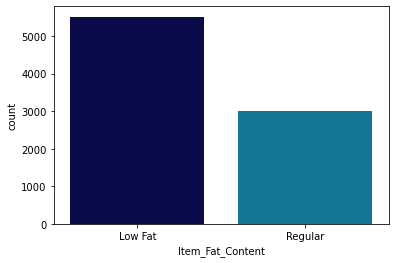

In [24]:
sns.countplot('Item_Fat_Content',palette='ocean',data=train_df);

# Products with Low fat are bought more

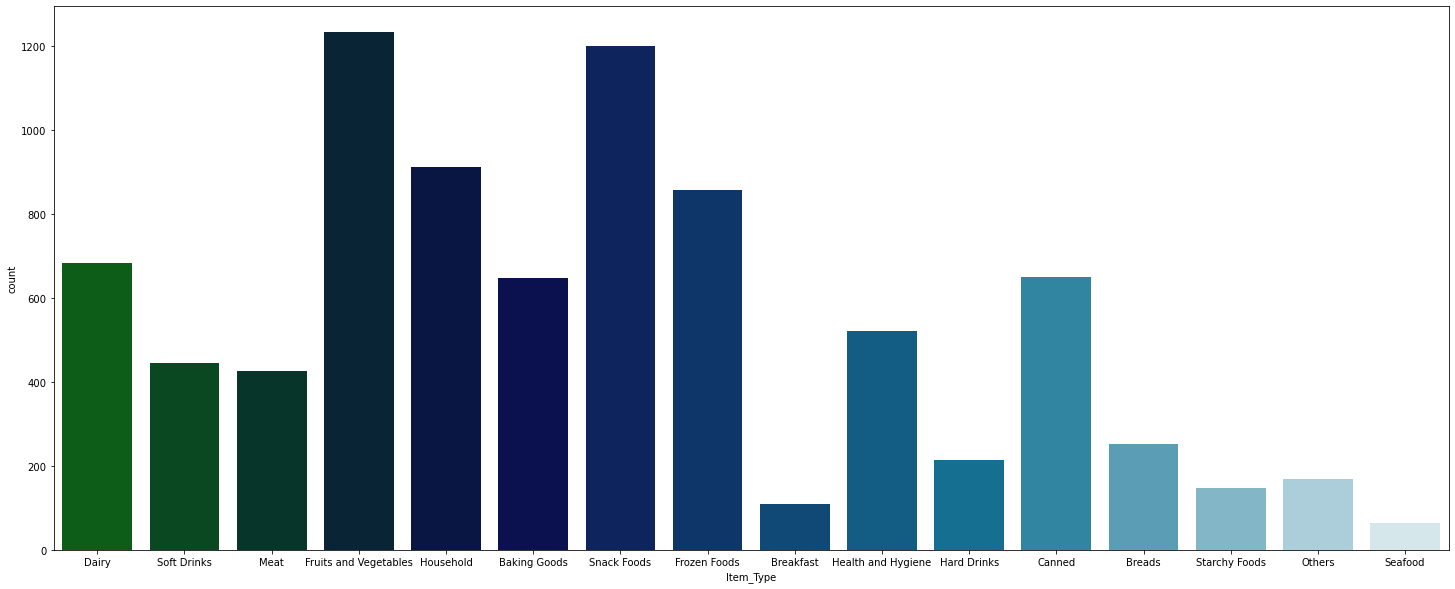

In [25]:
plt.figure(figsize=(25,10))
sns.countplot('Item_Type',palette='ocean',data=train_df);

# Items like Fruits and begetables and snack foods are brought more 

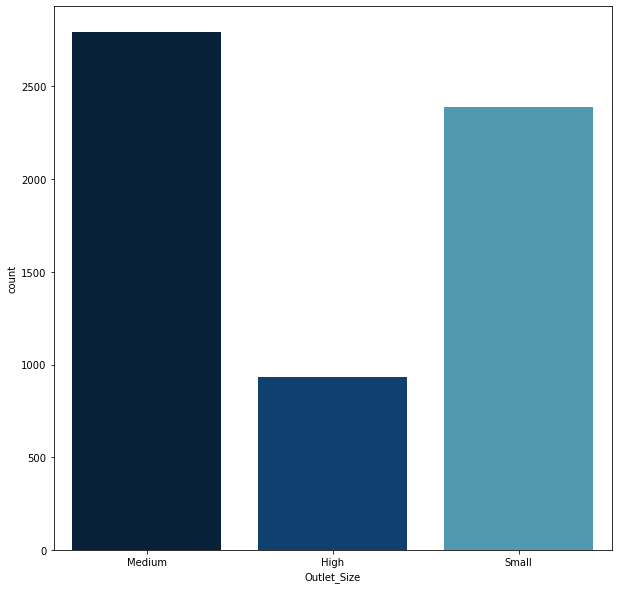

In [26]:
plt.figure(figsize=(10,10))
sns.countplot('Outlet_Size',palette='ocean',data=train_df);

# Medium type outlet are  more

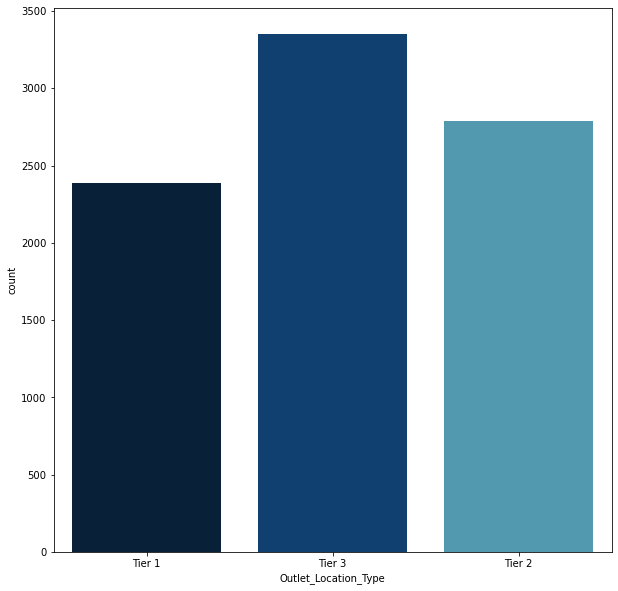

In [27]:
plt.figure(figsize=(10,10))
sns.countplot('Outlet_Location_Type',palette='ocean',data=train_df);

# Outlet in Tier 3 are more 

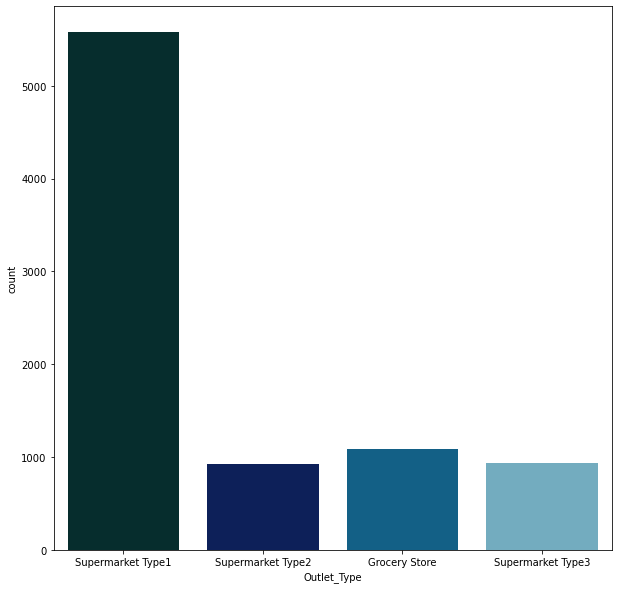

In [28]:
plt.figure(figsize=(10,10))
sns.countplot('Outlet_Type',palette='ocean',data=train_df);

# Outlets of Supermarket Type 1 are more 

# 5. Bivarient Analysis
will do Bivarient analysis with our target Outlet_sales 

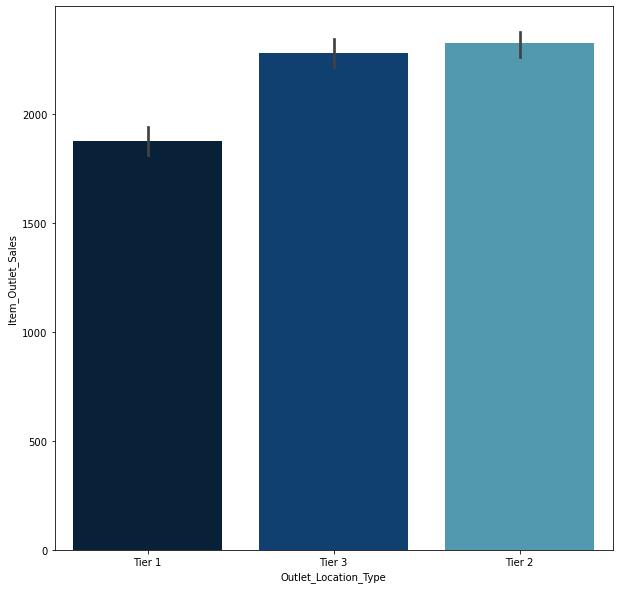

In [29]:
plt.figure(figsize=(10,10))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',palette='ocean',data=train_df);

# Tier 2 and 3 has almost equal amount of sales 

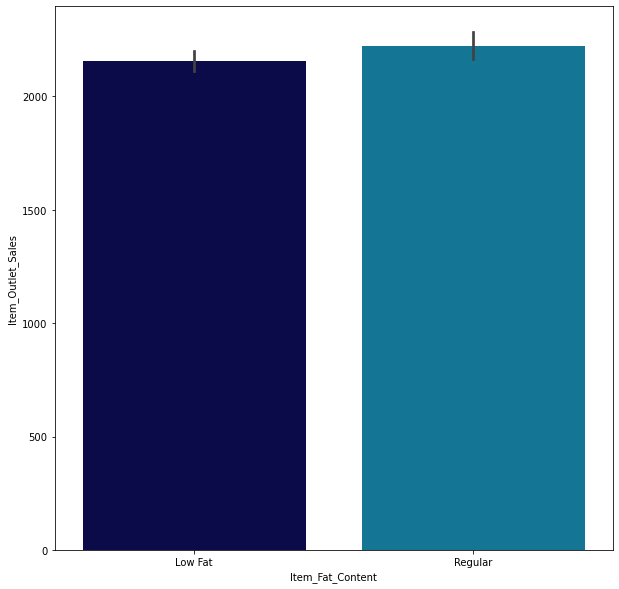

In [30]:
plt.figure(figsize=(10,10))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',palette='ocean',data=train_df);

# the Product with both type of fats have more sales 

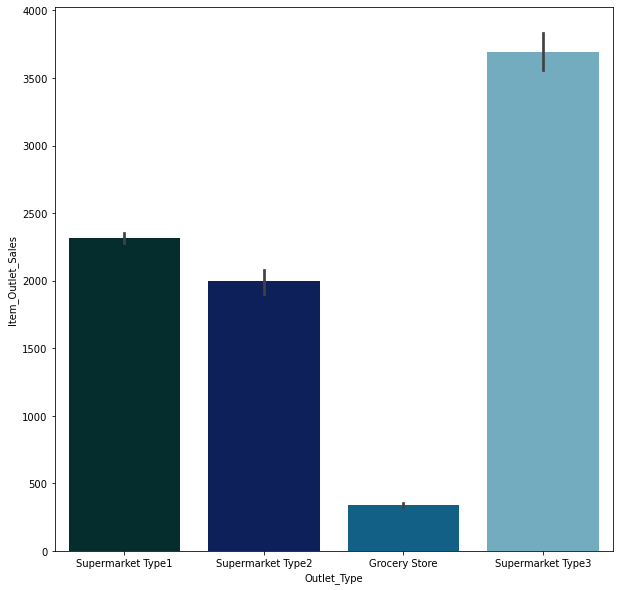

In [31]:
plt.figure(figsize=(10,10))
sns.barplot('Outlet_Type','Item_Outlet_Sales',palette='ocean',data=train_df);

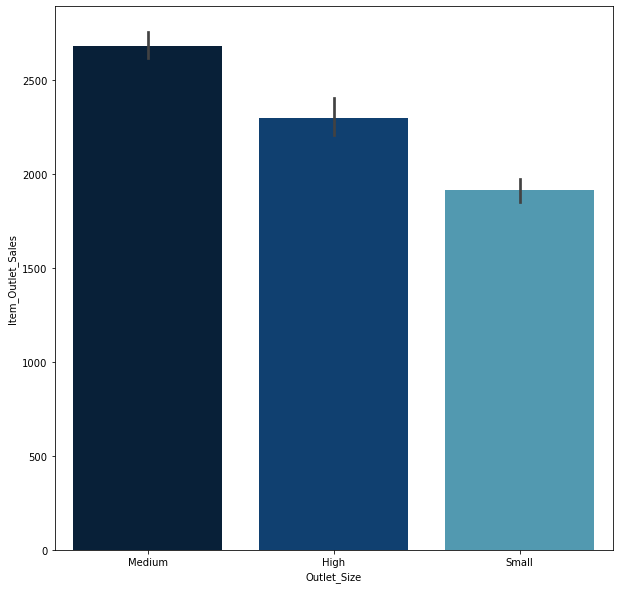

In [32]:
plt.figure(figsize=(10,10))
sns.barplot('Outlet_Size','Item_Outlet_Sales',palette='ocean',data=train_df);

# Medium size outlets have more sale

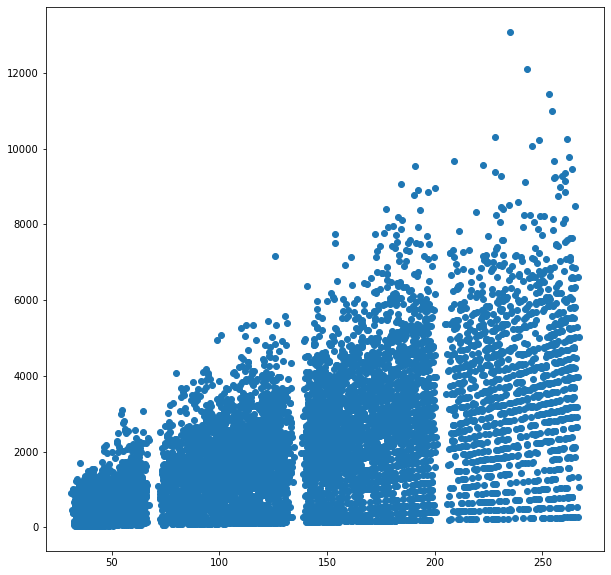

In [33]:
plt.figure(figsize=(10,10))
plt.scatter('Item_MRP','Item_Outlet_Sales',data=train_df);

# Items with 200-250 dollers have high sales 

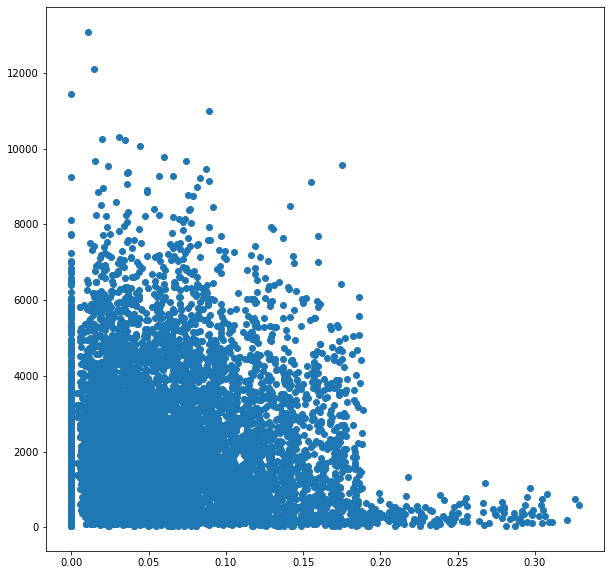

In [34]:

plt.figure(figsize=(10,10))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=train_df);

In [35]:
# Above diagram shows item with 0 visibilty has more sales but this is not possible at all so will do changes 
train_df['Item_Visibility'] = train_df['Item_Visibility'].replace(0,train_df['Item_Visibility'].mean())

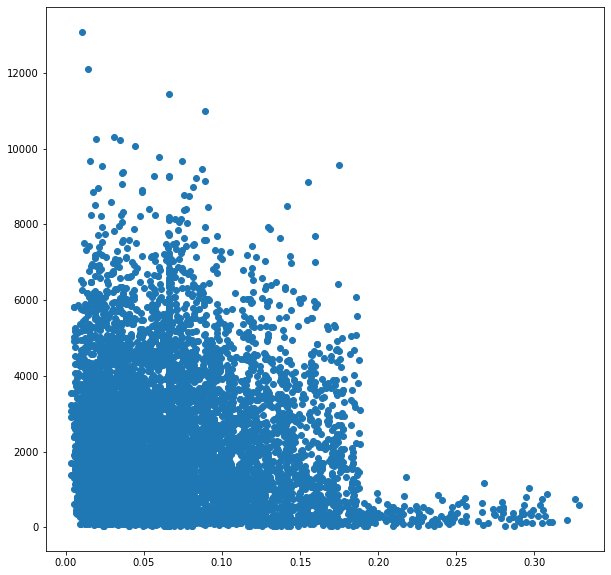

In [36]:

plt.figure(figsize=(10,10))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=train_df);

# 6.Multivarient Analysis

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

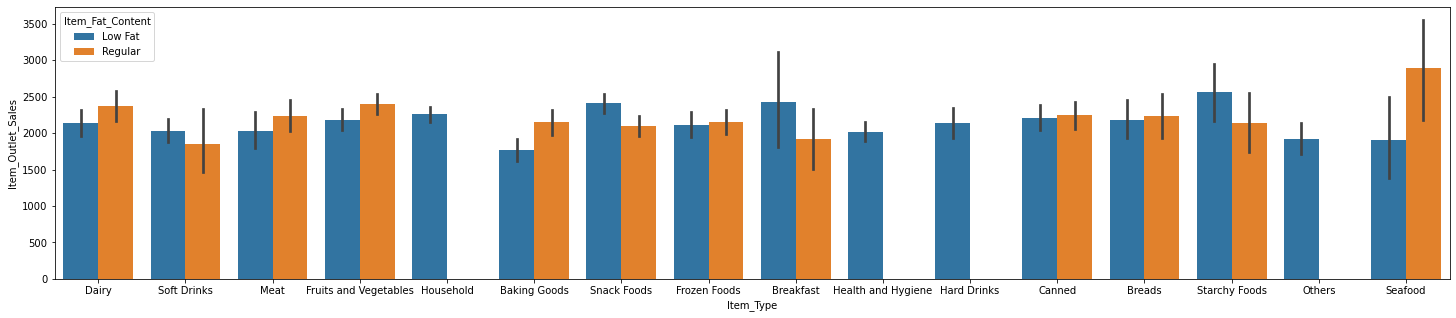

In [37]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train_df)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

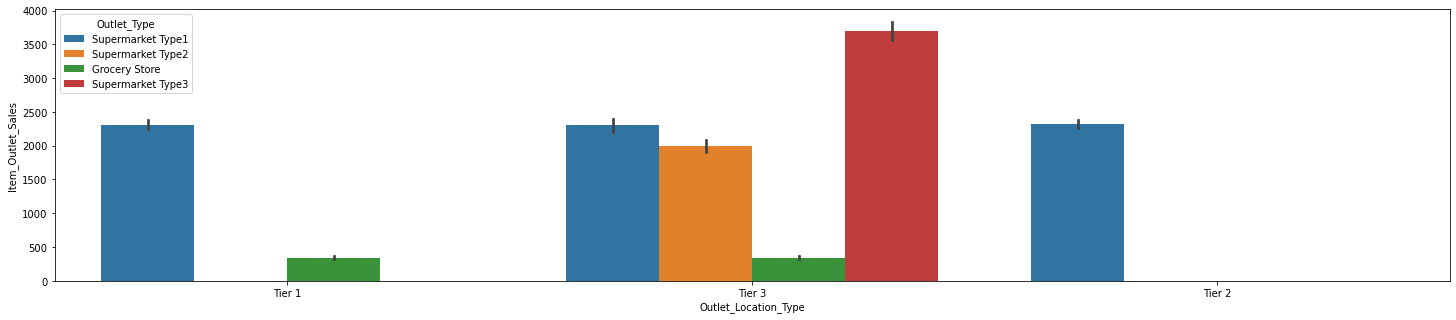

In [38]:
plt.figure(figsize=(25,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train_df)

# Observation
1. Tier 3 location has all the types of outlet with high sales 
2. Tier 2 only have supermarket type 1 
3. Tier 1 nad Tier3 have Grocery store 



So By Using Clustering Algorithm we may get cluster

# Feature Engineering 

In [39]:
for i in train_df.columns:
    if len(train_df[i].unique()) <=20:
        print(i ,':', train_df[i].unique())
        print('-'*120)

Item_Fat_Content : ['Low Fat' 'Regular']
------------------------------------------------------------------------------------------------------------------------
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
------------------------------------------------------------------------------------------------------------------------
Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
------------------------------------------------------------------------------------------------------------------------
Outlet_Establishment_Year : [1999 2009 1998 1987 1985 2002 2007 1997 2004]
------------------------------------------------------------------------------------------------------------------------
Outlet_Size : ['Medium' nan 'High' 'Small']
-----------------

In [40]:
train_df[['Item_Identifier','Item_Type']]

,Item_Identifier,Item_Type
0,FDA15,Dairy
1,DRC01,Soft Drinks
2,FDN15,Meat
3,FDX07,Fruits and Vegetables
4,NCD19,Household
...,...,...
8518,FDF22,Snack Foods
8519,FDS36,Baking Goods
8520,NCJ29,Health and Hygiene
8521,FDN46,Snack Foods


# We can make three categoreis from Item Identifier as we see item type and item identifier 
# FD : Food , NC  Non Consumable , DR : Drink

In [41]:
train_df['Item_Identifier'] = train_df['Item_Identifier'].apply(lambda x:x[:2])

In [42]:
train_df['Item_Identifier'].unique()  # Now we have three types of Items 

array(['FD', 'DR', 'NC'], dtype=object)

# Also we can derive age of outlet till 2013  and will drop the Outlet Establishment Year

In [43]:
train_df['Age_Outlet'] = 2013 - train_df['Outlet_Establishment_Year']
train_df.drop(columns=['Outlet_Establishment_Year'],inplace=True)

In [44]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Outlet
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,15
4,NC,8.930,Low Fat,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,26
8519,FD,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,NaN,Tier 2,Supermarket Type1,549.2850,11
8520,NC,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,FD,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,4


# Those product who are non-consumbale but have fat content will replace them with non-ediable fat content

In [45]:
print(f"{train_df[train_df['Item_Identifier']=='NC']['Item_Type'].unique()}")
print("These products don't have any fat content so will replace their fat content with Non Edible" )

['Household' 'Health and Hygiene' 'Others']
These products don't have any fat content so will replace their fat content with Non Edible


In [46]:
train_df.loc[train_df['Item_Identifier']=='NC','Item_Fat_Content'] = 'Non Edible'

In [47]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Outlet
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,15
4,NC,8.930,Non Edible,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,26
8519,FD,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,NaN,Tier 2,Supermarket Type1,549.2850,11
8520,NC,10.600,Non Edible,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,FD,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,4


# Also due to indentifier coloumn , Item type will not help and it also increase the dimension after further process 

# Will drop the item_type columns

In [48]:
# Will first do encoding on Above Table 
data = train_df.copy()
data.drop(columns=['Item_Type','Outlet_Identifier'],inplace = True)

In [49]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Outlet
0,FD,9.300,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.920,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FD,17.500,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.200,Regular,0.066132,182.0950,NaN,Tier 3,Grocery Store,732.3800,15
4,NC,8.930,Non Edible,0.066132,53.8614,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,214.5218,High,Tier 3,Supermarket Type1,2778.3834,26
8519,FD,8.380,Regular,0.046982,108.1570,NaN,Tier 2,Supermarket Type1,549.2850,11
8520,NC,10.600,Non Edible,0.035186,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,FD,7.210,Regular,0.145221,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,4


# Handling Categorical Values 
# Encoding the Categorical Values 

In [50]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Outlet
0,FD,9.300,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.920,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FD,17.500,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.200,Regular,0.066132,182.0950,NaN,Tier 3,Grocery Store,732.3800,15
4,NC,8.930,Non Edible,0.066132,53.8614,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,214.5218,High,Tier 3,Supermarket Type1,2778.3834,26
8519,FD,8.380,Regular,0.046982,108.1570,NaN,Tier 2,Supermarket Type1,549.2850,11
8520,NC,10.600,Non Edible,0.035186,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,FD,7.210,Regular,0.145221,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,4


# Will perfrom Label Encoding because Data is oridnal on below columns 
1. Item_Identifier
2. Item_Fat_Content
3. Outlet_size
4. Outlet_Location_type
5. Outlet_type


In [51]:
for i in data.columns:
    if len(data[i].unique()) <=20:
        print(i ,':', data[i].unique())
        print('-'*120)


Item_Identifier : ['FD' 'DR' 'NC']
------------------------------------------------------------------------------------------------------------------------
Item_Fat_Content : ['Low Fat' 'Regular' 'Non Edible']
------------------------------------------------------------------------------------------------------------------------
Outlet_Size : ['Medium' nan 'High' 'Small']
------------------------------------------------------------------------------------------------------------------------
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
------------------------------------------------------------------------------------------------------------------------
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
------------------------------------------------------------------------------------------------------------------------
Age_Outlet : [14  4 15 26 28 11  6 16  9]
---------------------------------------------------------------------------

In [52]:
encoder = LabelEncoder()
features = ['Item_Identifier','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in features:
    data[i] = encoder.fit_transform(data[i])

In [53]:
encoder.classes_

array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

In [54]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Outlet
0,1,9.300,0,0.016047,249.8092,1,0,1,3735.1380,14
1,0,5.920,2,0.019278,48.2692,1,2,2,443.4228,4
2,1,17.500,0,0.016760,141.6180,1,0,1,2097.2700,14
3,1,19.200,2,0.066132,182.0950,3,2,0,732.3800,15
4,2,8.930,1,0.066132,53.8614,0,2,1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,214.5218,0,2,1,2778.3834,26
8519,1,8.380,2,0.046982,108.1570,3,1,1,549.2850,11
8520,2,10.600,1,0.035186,85.1224,2,1,1,1193.1136,9
8521,1,7.210,2,0.145221,103.1332,1,2,2,1845.5976,4


In [55]:
# While encoding Nan values of Outlet_size got encoded with 3 so we are replacing it 
data['Outlet_Size'].replace(3,np.nan,inplace=True)

# Handling Missing Values 
We will use KNNImputer Method to Handle the missing Values 

In [56]:
missing_values_df(data)

,missing_values_percentage,missing_values_total
Item_Identifier,0.000000,0
Item_Weight,17.165317,1463
Item_Fat_Content,0.000000,0
Item_Visibility,0.000000,0
Item_MRP,0.000000,0
Outlet_Size,28.276428,2410
Outlet_Location_Type,0.000000,0
Outlet_Type,0.000000,0
Item_Outlet_Sales,0.000000,0
Age_Outlet,0.000000,0


In [57]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data) # impute the missing values
new_data = pd.DataFrame(data=new_array,columns=data.columns)

In [58]:
new_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Outlet
0,1.0,9.300,0.0,0.016047,249.8092,1.0,0.0,1.0,3735.1380,14.0
1,0.0,5.920,2.0,0.019278,48.2692,1.0,2.0,2.0,443.4228,4.0
2,1.0,17.500,0.0,0.016760,141.6180,1.0,0.0,1.0,2097.2700,14.0
3,1.0,19.200,2.0,0.066132,182.0950,2.0,2.0,0.0,732.3800,15.0
4,2.0,8.930,1.0,0.066132,53.8614,0.0,2.0,1.0,994.7052,26.0
...,...,...,...,...,...,...,...,...,...,...
8518,1.0,6.865,0.0,0.056783,214.5218,0.0,2.0,1.0,2778.3834,26.0
8519,1.0,8.380,2.0,0.046982,108.1570,1.0,1.0,1.0,549.2850,11.0
8520,2.0,10.600,1.0,0.035186,85.1224,2.0,1.0,1.0,1193.1136,9.0
8521,1.0,7.210,2.0,0.145221,103.1332,1.0,2.0,2.0,1845.5976,4.0


In [59]:
missing_values_df(new_data)

,missing_values_percentage,missing_values_total
Item_Identifier,0.0,0
Item_Weight,0.0,0
Item_Fat_Content,0.0,0
Item_Visibility,0.0,0
Item_MRP,0.0,0
Outlet_Size,0.0,0
Outlet_Location_Type,0.0,0
Outlet_Type,0.0,0
Item_Outlet_Sales,0.0,0
Age_Outlet,0.0,0


In [60]:
new_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Outlet
0,1.0,9.300,0.0,0.016047,249.8092,1.0,0.0,1.0,3735.1380,14.0
1,0.0,5.920,2.0,0.019278,48.2692,1.0,2.0,2.0,443.4228,4.0
2,1.0,17.500,0.0,0.016760,141.6180,1.0,0.0,1.0,2097.2700,14.0
3,1.0,19.200,2.0,0.066132,182.0950,2.0,2.0,0.0,732.3800,15.0
4,2.0,8.930,1.0,0.066132,53.8614,0.0,2.0,1.0,994.7052,26.0
...,...,...,...,...,...,...,...,...,...,...
8518,1.0,6.865,0.0,0.056783,214.5218,0.0,2.0,1.0,2778.3834,26.0
8519,1.0,8.380,2.0,0.046982,108.1570,1.0,1.0,1.0,549.2850,11.0
8520,2.0,10.600,1.0,0.035186,85.1224,2.0,1.0,1.0,1193.1136,9.0
8521,1.0,7.210,2.0,0.145221,103.1332,1.0,2.0,2.0,1845.5976,4.0


In [61]:
new_data.dtypes.index

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Age_Outlet'],
      dtype='object')

In [62]:
num = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Age_Outlet']

<AxesSubplot:>

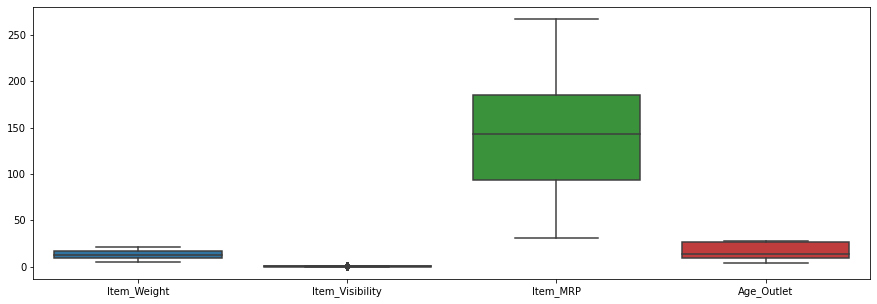

In [63]:
plt.figure(figsize=(15,5))
sns.boxplot(data=new_data[num])

# We don't have any outliers 

# Correlation 

In [64]:
def vif_score(data,col):
    y=data[col]
    x=data.drop([col],axis=1)
    scaler=StandardScaler()
    X_scaled = scaler.fit_transform(x)
    vif= pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
    vif['Features'] = x.columns
    return vif

In [65]:
vif_score(new_data,'Item_Outlet_Sales')

,VIF,Features
0,1.044178,Item_Identifier
1,1.004720,Item_Weight
2,1.037335,Item_Fat_Content
3,1.067242,Item_Visibility
4,1.001852,Item_MRP
5,1.551885,Outlet_Size
6,1.625005,Outlet_Location_Type
7,1.349929,Outlet_Type
8,1.130043,Age_Outlet


# Data don't have any correlation amongst the features 

# Scaling Numeric Features 

In [66]:
num_df = new_data[num]
scaler = StandardScaler()
num_array = scaler.fit_transform(num_df)
num_df = pd.DataFrame(num_array,columns=num_df.columns)

In [67]:
cat_df = new_data.drop(columns=num)

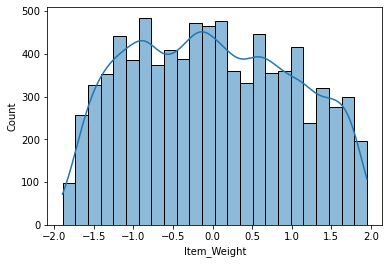

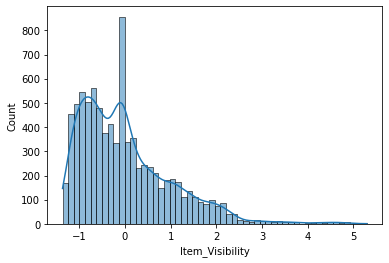

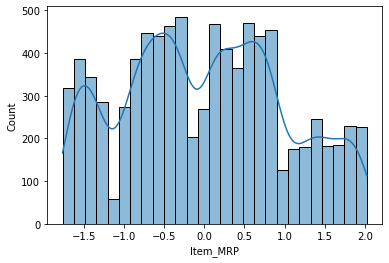

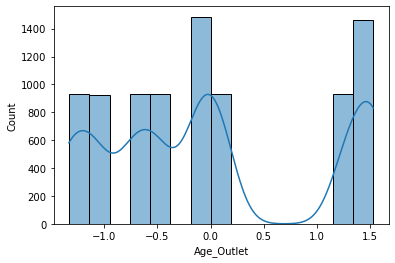

In [68]:
for i in num_df:
    sns.histplot(num_df[i],kde=True)
    plt.show()

In [69]:
final_data = pd.concat([num_df,cat_df],axis=1)

In [70]:
final_data

,Item_Weight,Item_Visibility,Item_MRP,Age_Outlet,Item_Identifier,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.808326,-1.111358,1.747454,-0.139541,1.0,0.0,1.0,0.0,1.0,3735.1380
1,-1.581672,-1.045067,-1.489023,-1.334103,0.0,2.0,1.0,2.0,2.0,443.4228
2,1.067837,-1.096733,0.010040,-0.139541,1.0,0.0,1.0,0.0,1.0,2097.2700
3,1.456798,-0.083740,0.660050,-0.020085,1.0,2.0,2.0,2.0,0.0,732.3800
4,-0.892983,-0.083740,-1.399220,1.293934,2.0,1.0,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,-1.365456,-0.275551,1.180783,1.293934,1.0,0.0,0.0,2.0,1.0,2778.3834
8519,-1.018823,-0.476643,-0.527301,-0.497909,1.0,2.0,1.0,1.0,1.0,549.2850
8520,-0.510886,-0.718672,-0.897208,-0.736822,2.0,1.0,2.0,1.0,1.0,1193.1136
8521,-1.286519,1.538968,-0.607977,-1.334103,1.0,2.0,1.0,2.0,2.0,1845.5976


In [71]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Visibility       8523 non-null   float64
 2   Item_MRP              8523 non-null   float64
 3   Age_Outlet            8523 non-null   float64
 4   Item_Identifier       8523 non-null   float64
 5   Item_Fat_Content      8523 non-null   float64
 6   Outlet_Size           8523 non-null   float64
 7   Outlet_Location_Type  8523 non-null   float64
 8   Outlet_Type           8523 non-null   float64
 9   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(10)
memory usage: 666.0 KB


In [72]:
final_data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Age_Outlet,Item_Identifier,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,6.836801e-17,-2.256138e-17,-1.644427e-16,-1.060886e-16,1.093864,0.892995,1.308147,1.112871,1.201220,2181.288914
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,0.522090,0.895005,0.632993,0.812757,0.796459,1706.499616
min,-1.893985e+00,-1.367266e+00,-1.761688e+00,-1.334103e+00,0.000000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,-8.498919e-01,-7.617782e-01,-7.574307e-01,-7.368218e-01,1.000000,0.000000,1.000000,0.000000,1.000000,834.247400
50%,-5.328490e-02,-1.579196e-01,3.243893e-02,-1.395408e-01,1.000000,1.000000,1.333333,1.000000,1.000000,1794.331000
75%,8.047169e-01,5.000528e-01,7.170372e-01,1.293934e+00,1.000000,2.000000,2.000000,2.000000,1.000000,3101.296400
max,1.948719e+00,5.297182e+00,2.021724e+00,1.532846e+00,2.000000,2.000000,2.000000,2.000000,3.000000,13086.964800


In [73]:
final_data.to_csv('Processod_data.csv')